In [6]:
#Description: Create and plot miltiple technical indicators
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [7]:
df= yf.Ticker('TSLA').history(start='2019-11-25',end='2020-11-23')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-25,68.863998,68.914001,66.891998,67.267998,61697500,0,0.0
2019-11-26,67.054001,67.099998,65.419998,65.783997,39737000,0,0.0
2019-11-27,66.223999,66.786003,65.713997,66.258003,27778000,0,0.0
2019-11-29,66.222000,66.251999,65.500000,65.987999,12328000,0,0.0
2019-12-02,65.879997,67.276001,65.737999,66.973999,30372500,0,0.0
...,...,...,...,...,...,...,...
2020-11-16,408.929993,412.450012,404.089996,408.089996,26838600,0,0.0
2020-11-17,460.170013,462.000000,433.010010,441.609985,61188300,0,0.0
2020-11-18,448.350006,496.000000,443.500000,486.640015,78044000,0,0.0


In [31]:
#Create Function to Calculate the SMA & EMA
#create the Simple Moving Average(SMA)
def SMA(data,period=30,column='Close'):
    return data[column].rolling(window=period).mean()
#Create the Exponential Moving Average(EMA)
def EMA(data,period=20, column='Close'):
    return data[column].ewm(span=period,adjust=False).mean()

In [32]:
#Calculate The Moving Average Convergene/Divergence (MACD):
def MACD(data,period_long=26,period_short=12,period_signal=9,column='Close'):
    #Calculate The Short Term Exponential Moving Average
    ShortEMA=EMA(data,period_short,column=column)
    #Calculate The Long Term Exponential Moving Average
    LongEMA=EMA(data, period_long,column=column)
    #Calculate The Moving Average Convergene/Divergence (MACD):
    data['MACD']=ShortEMA-LongEMA
    #Calcualte The signal Line
    data['Signal_Line']=EMA(data,period_signal,column='MACD')
    
    return data

In [35]:
#Create a function to compute the Relative Strength Index (RSI)
def RSI(data,period=14,column='Close'):
    delta=data[column].diff(1)
    delta=delta[1:]
    up=delta.copy()
    down=delta.copy()
    up[up<0]=0
    down[down>0]=0
    data['up']=up
    data['down']=down
    AVG_Gain = SMA(data,period,column='up')
    AVG_Loss=abs(SMA(data,period,column='down'))
    RS=AVG_Gain/AVG_Loss
    RSI=100.0-(100.0/(1.0+RS))
    data['RSI']=RSI
    
    return data

In [36]:
MACD(df)
RSI(df)
df['SMA']=SMA(df)
df['EMA']=EMA(df)

In [38]:
#Show the Data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal_Line,up,down,RSI,SMA,EMA
Date,,,,,,,,,,,,,,
2019-11-25,68.863998,68.914001,66.891998,67.267998,61697500,0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,67.267998
2019-11-26,67.054001,67.099998,65.419998,65.783997,39737000,0,0.0,-0.118382,-0.023676,0.000000,-1.484001,NaN,NaN,67.126664
2019-11-27,66.223999,66.786003,65.713997,66.258003,27778000,0,0.0,-0.171970,-0.053335,0.474007,0.000000,NaN,NaN,67.043935
2019-11-29,66.222000,66.251999,65.500000,65.987999,12328000,0,0.0,-0.233533,-0.089375,0.000000,-0.270004,NaN,NaN,66.943369
2019-12-02,65.879997,67.276001,65.737999,66.973999,30372500,0,0.0,-0.200450,-0.111590,0.986000,0.000000,NaN,NaN,66.946286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,408.929993,412.450012,404.089996,408.089996,26838600,0,0.0,-2.360298,-0.878221,0.000000,-0.410004,44.306404,423.340334,417.424970
2020-11-17,460.170013,462.000000,433.010010,441.609985,61188300,0,0.0,-0.092284,-0.721034,33.519989,0.000000,61.083776,424.261333,419.728305
2020-11-18,448.350006,496.000000,443.500000,486.640015,78044000,0,0.0,5.277840,0.478741,45.030029,0.000000,68.879821,426.306001,426.100849


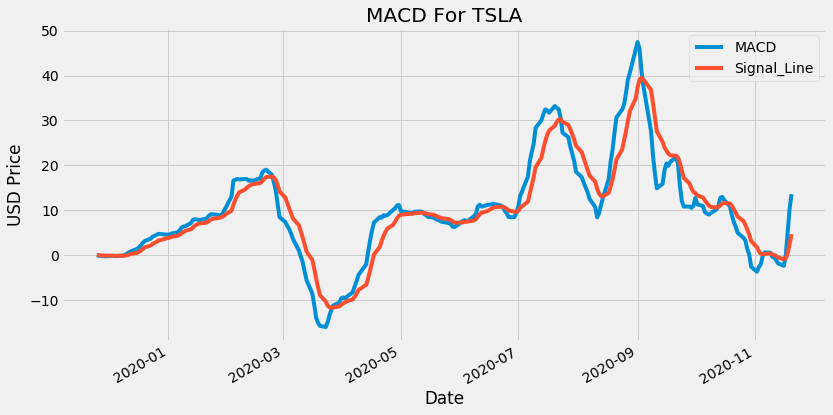

In [40]:
#plot the Chart
#Create a list of columns to keep
column_list=['MACD','Signal_Line']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('MACD For TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

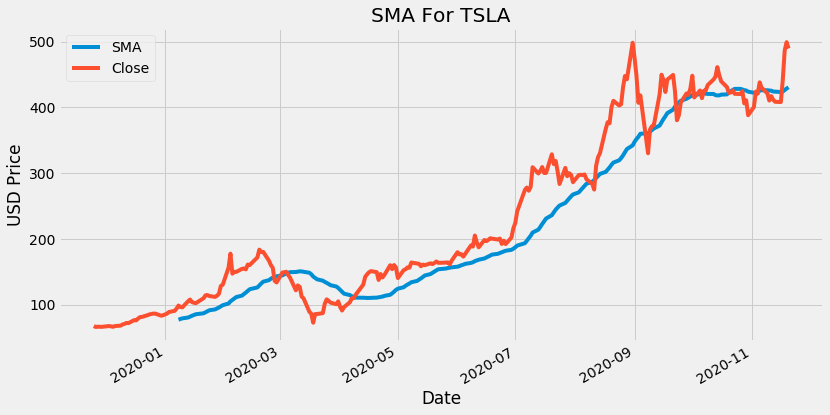

In [41]:
#plot the Chart
#Create a list of columns to keep
column_list=['SMA','Close']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('SMA For TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

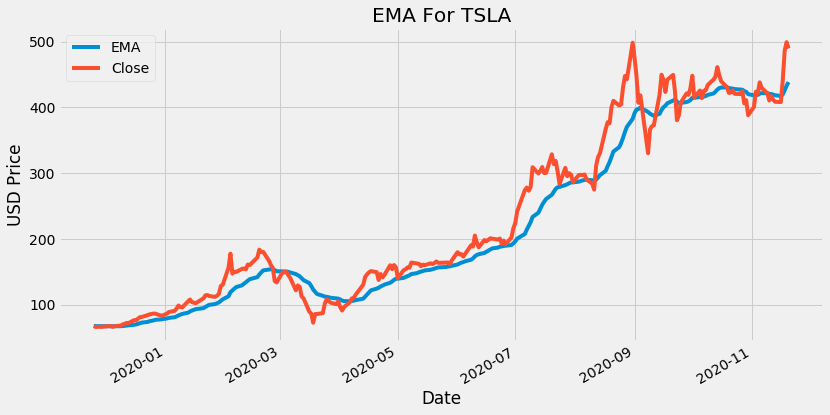

In [43]:
#plot the Chart
#Create a list of columns to keep
column_list=['EMA','Close']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('EMA For TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

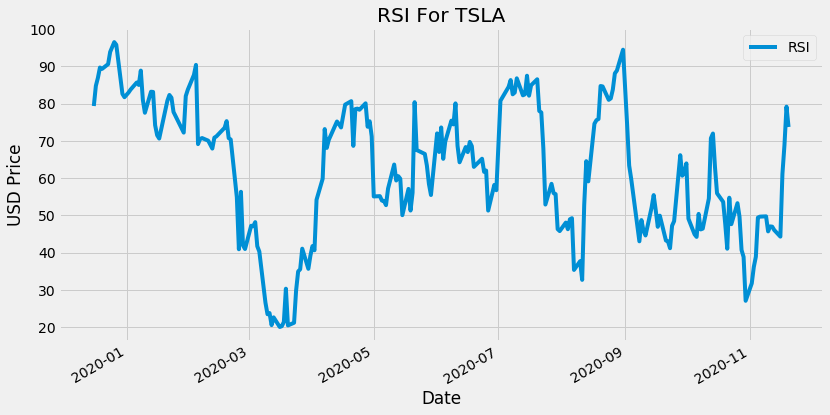

In [45]:
#plot the Chart
#Create a list of columns to keep
column_list=['RSI']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('RSI For TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()
#Suppor price is 30 and breakdown price is 70